# DSCI 503 – Project 04
### Talaya Francois

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Part 1: Loading the Dataset; Preliminary Analysis
In this section, we will look at the first 5 rows of the forest cover dataset, display the size of the dataset, figure out how many samples belong to each cover type, and create a color palette for visual representations in the project.

In [2]:
fc = pd.read_csv('forest_cover.txt', sep='\t') 
fc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


We will determine the size of the dataset.

In [3]:
print(fc.shape)

(15120, 13)


We will now explore the distribution of cover types in the data set.

In [4]:
fc.loc[:, 'Cover_Type'].value_counts().sort_index()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

In the next cell we will create a color palette to use to visualize the data later on.  

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
In this section, we will create a DataFrame to store the data for the distribution of cover type by wilderness area. Then we will graph this data in a stacked bar chart. We will start by determining the distribution of the wilderness areas within our dataset. 

In [6]:
fc.loc[:, 'Wilderness_Area'].value_counts().sort_index()

Wilderness_Area
Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: count, dtype: int64

We will create a DataFrame to determine the how many regions of each cover type are in each of the four wilderness areas.

In [7]:
ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


Next, we will create a stacked bar chart to represent the cover type by wilderness area. The chart represents information from the DataFrame we created in the cell above.

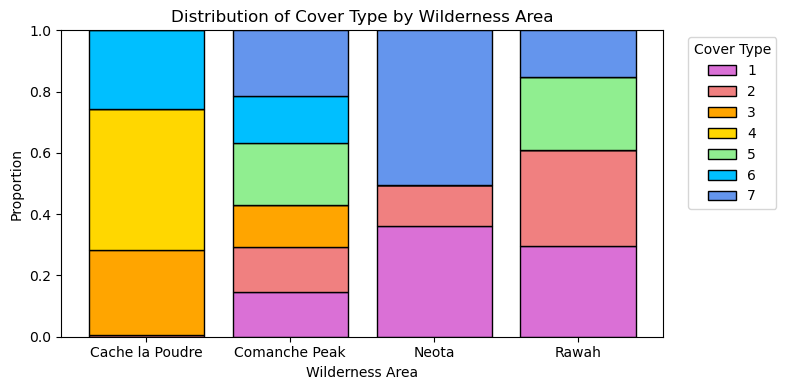

In [8]:
ct_by_wa_props = ct_by_wa / ct_by_wa.sum()
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

plt.figure(figsize=[8, 4])

# Loop over rows 
for i in range(len(ct_by_wa_props)):
    # Row data
    heights = ct_by_wa_props.iloc[i]
    bottoms = bb.iloc[i]
    color = palette[i]
    ct_label = ct_by_wa_props.index[i]

    # Plot bar layer
    plt.bar(ct_by_wa_props.columns, heights, bottom=bottoms,              
            color=color, edgecolor='black', label=ct_label)

plt.xlabel("Wilderness Area")
plt.ylabel("Proportion")
plt.title("Distribution of Cover Type by Wilderness Area")

plt.legend(title="Cover Type", bbox_to_anchor=(1.2, 1), loc="upper right")

plt.tight_layout()
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
In this section, we will create a DataFrame to store the data for the distribution of cover type by soil type. Then we will graph this data in a stacked bar chart. We will start by creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types. 

In [9]:
ct_by_st = pd.crosstab(fc['Cover_Type'], fc['Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


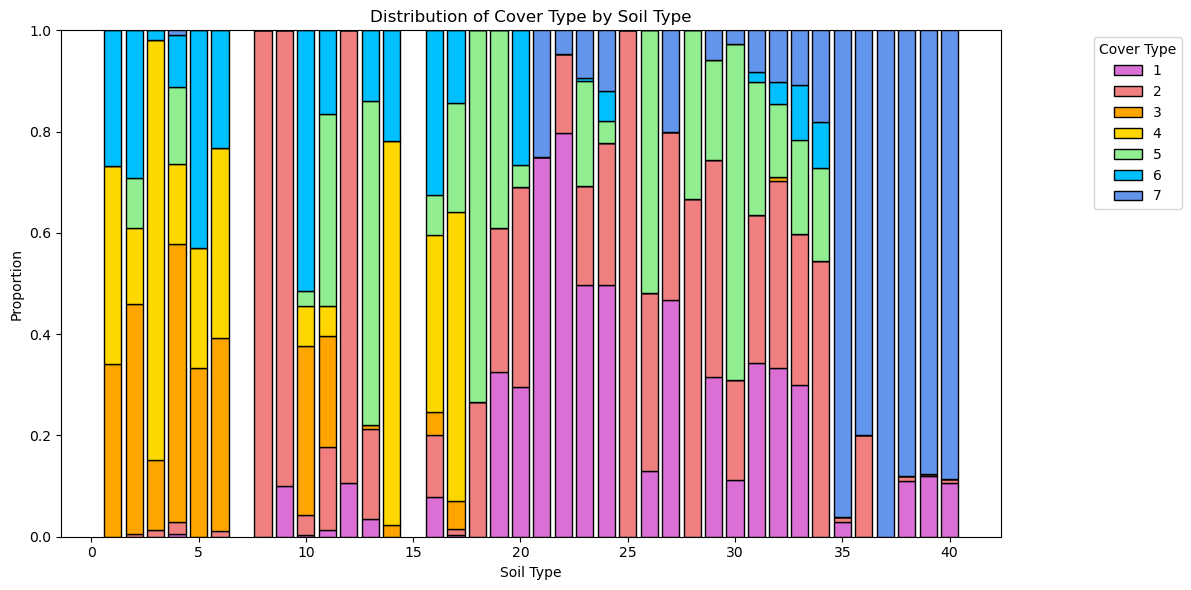

In [10]:
ct_by_st_props = ct_by_st / ct_by_st.sum()
bb = np.cumsum(ct_by_st_props) - ct_by_st_props

plt.figure(figsize=[12, 6])

for i in range(len(ct_by_st_props)):
    
    heights = ct_by_st_props.iloc[i]
    bottoms = bb.iloc[i]
    color = palette[i]
    ct_label2 = ct_by_st_props.index[i]

    # Plot bar layer
    plt.bar(ct_by_st_props.columns, heights, bottom=bottoms,              
            color=color, edgecolor='black', label=ct_label2)

plt.xlabel("Soil Type")
plt.ylabel("Proportion")
plt.title("Distribution of Cover Type by Soil Type")

plt.legend(title="Cover Type", bbox_to_anchor=(1.2, 1), loc="upper right")

plt.tight_layout()
plt.show()

## Part 4: Distribution of Elevation by Cover Type
In this section, we we create a DataFrame to analyze how elevation is distributed across different cover types. Then we graph this DataFrame in a series of histograms. We will start by calculating the average elevation for each of the seven cover types.

In [11]:
mean_elevation = (fc.loc[:, ['Elevation', 'Cover_Type']]
                  .groupby('Cover_Type')
                  .mean()
                 )
mean_elevation

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


We will create histograms to visually explore the distribution of elevations for each of the seven cover types. 

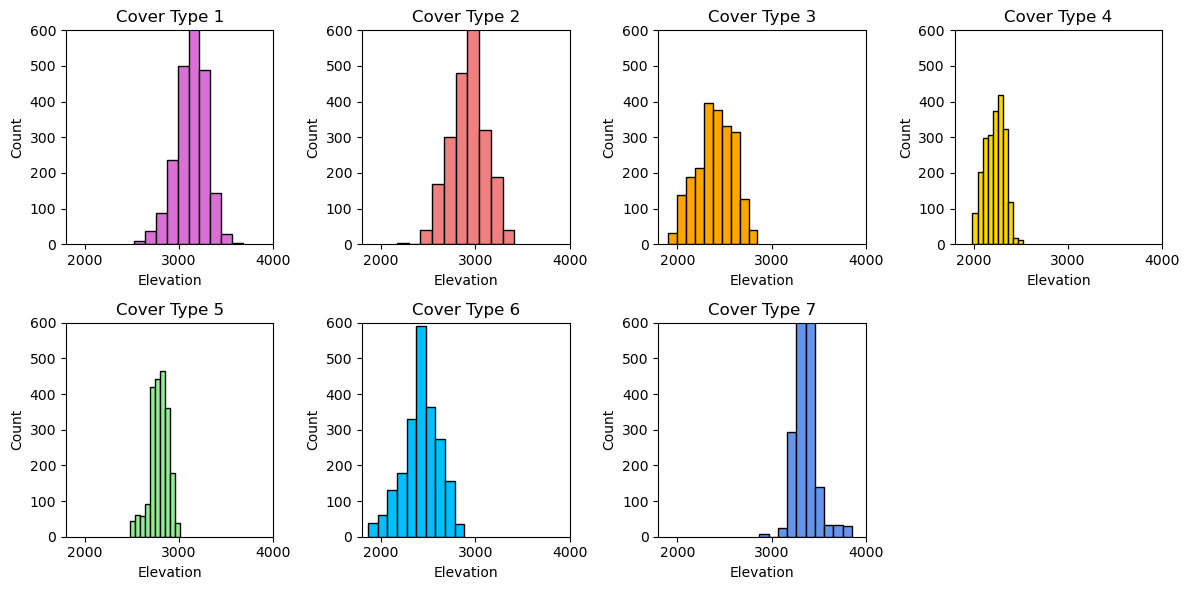

In [12]:
plt.figure(figsize=[12, 6])
bins=np.arange(1800, 4050, 50)

for i in range(1, 8):
   
    plt.subplot(2, 4, i)
             
    x_axis = fc[fc['Cover_Type'] == i]['Elevation']                      

    plt.hist(x_axis, color=palette[i-1], edgecolor='black')

    plt.title(f"Cover Type {i}")
    plt.xlim(1800,4000)
    plt.ylim(0,600)
    plt.xlabel('Elevation')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
In this section, we prepare the data for the machine learning models in the project. We will start by separating the categorical features, the numerical features, and the labels. We will also use one hot encoding for the categorical features and explore the shapes of the feature arrays. 

In [13]:
X_num = (fc.loc[:, ['Elevation',
                    'Aspect',
                    'Slope', 
                    'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology',
                    'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am',
                    'Hillshade_Noon',
                    'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points']].values 
        )

X_cat = fc.loc[:, ['Wilderness_Area', 'Soil_Type']].values
y = fc.loc[:, 'Cover_Type']
print(f"Numerical Feature Array Shape:   {X_num.shape}")
print(f"Categorical Feature Array Shape: {X_cat.shape}")
print(f"Label Array Shape:               {y.shape}")

Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)


We will now be encoding the categorical variables using one-hot encoding.

In [14]:
encoder = OneHotEncoder(sparse_output=False) 
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)
print(f"Encoded Feature Array Shape: {X_enc.shape}")

Encoded Feature Array Shape: (15120, 42)


We will now combine the numerical features with the encoded features.

In [15]:
X = np.hstack([X_num, X_enc])
print(f"Feature Array Shape: {X.shape}")

Feature Array Shape: (15120, 52)


We will now split the data into training, validation, and test sets, using a 70/15/15 split.

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

print(f"Training Features Shape:   {X_train.shape}")
print(f"Validation Features Shape: {X_valid.shape}")
print(f"Test Features Shape:       {X_test.shape}")

Training Features Shape:   (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape:       (2268, 52)


## Part 6: Logistic Regression Model
We will start by scaling the data. The Logistic Regression model will be fit to the scaled data, and we will then display the model's training and validation accuracy.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)

lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', penalty=None)
lr_mod.fit(X_train_scaled, y_train)

lr_mod.fit(X_train, y_train)
train_acc = lr_mod.score(X_train_scaled, y_train)
valid_acc = lr_mod.score(X_valid_scaled, y_valid)
print('Training Accuracy:   ', round(train_acc,4))
print('Validation Accuracy: ', round(valid_acc,4))

C:\Users\talay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\talay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy:    0.308
Validation Accuracy:  0.2954


C:\Users\talay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models
In this section, we will create and evaluate several decision tree models. The code will perform hyperperameter tuning to calculate the most effective depth value for the decision trees. Lastly, we will graph the relationship between the decision tree accuracy and max_depth values.

In [18]:
dt_train_acc = []
dt_valid_acc = []

depth_range = range(2, 30)

for d in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=d, random_state=1)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))

dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

print('Optimal Value of max_depth:           ', round(dt_opt_depth, 4))
print('Training Accuracy for Optimal Model:  ', round(dt_train_acc[dt_idx], 4))
print('Validation Accuracy for Optimal Model:', round(dt_valid_acc[dt_idx], 4))

Optimal Value of max_depth:            18
Training Accuracy for Optimal Model:   0.9804
Validation Accuracy for Optimal Model: 0.772


We will plot the training and validation curves as a function of max_depth.

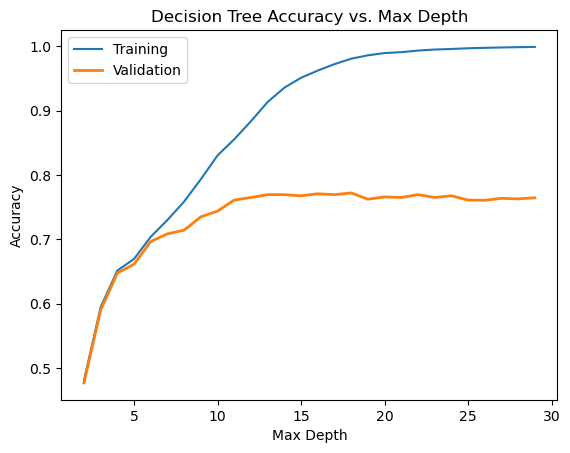

In [19]:
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, lw=2, label='Validation')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.show()

## Part 8: Random Forest Models
In this section, we will create and evaluate several random forest models.Then we will determine the training and validation accuracy for each Random Forest model. At the end, we will graph the relationship between model accuracy and max_depth.

In [20]:
rf_train_acc = []
rf_valid_acc = []

for d in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=d)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))

rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

print('Optimal Value of max_depth:           ', round(rf_opt_depth, 4))
print('Training Accuracy for Optimal Model:  ', round(rf_train_acc[rf_idx], 4))
print('Validation Accuracy for Optimal Model:', round(rf_valid_acc[rf_idx], 4))

Optimal Value of max_depth:            28
Training Accuracy for Optimal Model:   1.0
Validation Accuracy for Optimal Model: 0.8677


In the cell below, we will plot the training and validation curves as a function of max_depth.

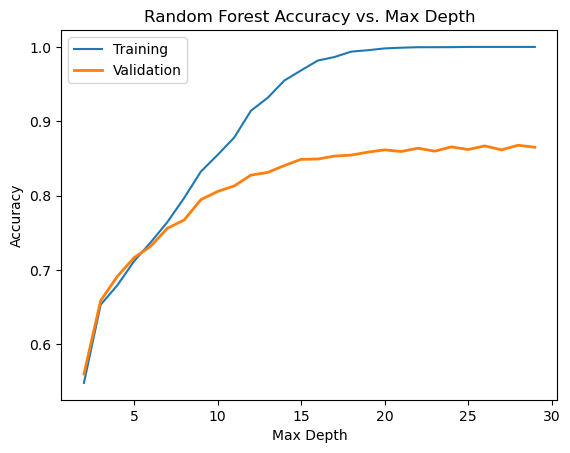

In [21]:
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, lw=2, label='Validation')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Max Depth')
plt.show()

## Part 9: Create and Evaluate Final Model
In this section, we will select our final model, and will evaluate it on the test set. Of the three model types created in this project, we will use the Random Forest as the final model because it has the highest validation accuracy. The hyperparameter values that gave the highest validation accuracy for the Random Forest model were: n_estimators=100 and max_depth=28.

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(n_estimators=100, max_depth=28)
final_model.fit(X_train, y_train)
fm_tr_acc = final_model.score(X_train, y_train)
fm_v_acc = final_model.score(X_valid, y_valid)
fm_test_acc = final_model.score(X_test, y_test)

print('Training Accuracy for Final Model:   ', round(fm_tr_acc, 4))
print('Validation Accuracy for Final Model: ', round(fm_v_acc, 4))
print('Testing Accuracy for Final Model:    ', round(fm_test_acc, 4))

Training Accuracy for Final Model:    1.0
Validation Accuracy for Final Model:  0.8677
Testing Accuracy for Final Model:     0.8593


We will now create and display a confusion matrix detailing the model's performance on the test set.

In [23]:
test_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test, test_pred)
cm_df = pd.DataFrame(cm)
cm_df.index = [1, 2, 3, 4, 5, 6, 7]        # Rename the rows
cm_df.columns = [1, 2, 3, 4, 5, 6, 7]      # Rename the columns
cm_df

,1,2,3,4,5,6,7
1,236,63,2,0,5,0,18
2,53,239,6,0,13,10,3
3,0,2,262,18,2,40,0
4,0,0,6,313,0,5,0
5,0,11,4,0,305,4,0
6,0,0,33,11,1,279,0
7,8,1,0,0,0,0,315


We will now generate a classification report to provide further insight into the
model's performance on the test set.

In [24]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       324
           2       0.76      0.74      0.75       324
           3       0.84      0.81      0.82       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.86      0.84       324
           7       0.94      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

